## 0. python imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import zipfile

%matplotlib inline

## 1. data loading / generation

In [2]:
zf = zipfile.ZipFile('./data/us-census-demographic-data.zip') 
census = pd.read_csv(zf.open('acs2015_county_data.csv'), index_col='CensusId')
census.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 1001 to 72153
Data columns (total 36 columns):
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Construction       3220 non-null float64
P

In [4]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPop,3220.0,99409.345963,319305.453731,85.0,11218.00,26035.00,66430.500,10038388.0
Men,3220.0,48896.937888,156681.276856,42.0,5637.25,12932.00,32992.750,4945351.0
Women,3220.0,50512.408075,162661.952823,43.0,5572.00,13057.00,33487.500,5093037.0
Hispanic,3220.0,11.011522,19.241380,0.0,1.90,3.90,9.825,99.9
White,3220.0,75.428789,22.932890,0.0,64.10,84.10,93.200,99.8
Black,3220.0,8.665497,14.279122,0.0,0.50,1.90,9.600,85.9
Native,3220.0,1.723509,7.253115,0.0,0.10,0.30,0.600,92.1
Asian,3220.0,1.229068,2.633079,0.0,0.20,0.50,1.200,41.6
Pacific,3220.0,0.082733,0.734931,0.0,0.00,0.00,0.000,35.3
Citizen,3220.0,69935.071739,205118.907371,80.0,8450.50,19643.00,49920.500,6046749.0


## 2. feature engineering

### 2.1 data types and memory optimization

it is probably not going to work in a laptop.

In [5]:
ctr = pd.read_csv('/home/david/Downloads/data/train.gz', nrows=1e6, index_col='id')
ctr.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,,,,,,,,,,,,,,,,,,,,,
1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,-1,79
1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15706,320,50,1722,0,35,100084,79
1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000000 entries, 1.0000094181510943e+18 to 1.4741884529351977e+19
Data columns (total 23 columns):
click               1000000 non-null int64
hour                1000000 non-null int64
C1                  1000000 non-null int64
banner_pos          1000000 non-null int64
site_id             1000000 non-null object
site_domain         1000000 non-null object
site_category       1000000 non-null object
app_id              1000000 non-null object
app_domain          1000000 non-null object
app_category        1000000 non-null object
device_id           1000000 non-null object
device_ip           1000000 non-null object
device_model        1000000 non-null object
device_type         1000000 non-null int64
device_conn_type    1000000 non-null int64
C14                 1000000 non-null int64
C15                 1000000 non-null int64
C16                 1000000 non-null int64
C17                 1000000 non-null int64
C18                 100

In [7]:
for cat_feature in ctr.select_dtypes('object').columns:
    ctr[cat_feature] = ctr[cat_feature].astype('category')

ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000000 entries, 1.0000094181510943e+18 to 1.4741884529351977e+19
Data columns (total 23 columns):
click               1000000 non-null int64
hour                1000000 non-null int64
C1                  1000000 non-null int64
banner_pos          1000000 non-null int64
site_id             1000000 non-null category
site_domain         1000000 non-null category
site_category       1000000 non-null category
app_id              1000000 non-null category
app_domain          1000000 non-null category
app_category        1000000 non-null category
device_id           1000000 non-null category
device_ip           1000000 non-null category
device_model        1000000 non-null category
device_type         1000000 non-null int64
device_conn_type    1000000 non-null int64
C14                 1000000 non-null int64
C15                 1000000 non-null int64
C16                 1000000 non-null int64
C17                 1000000 non-null int64
C18  

why? because categorical type is the most memory optimized data type in pandas when values are repeated a lot of times

In [8]:
for int_col in ctr.select_dtypes('integer').columns:
    ctr[int_col] = pd.to_numeric(ctr[int_col], downcast='integer')
    
ctr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000000 entries, 1.0000094181510943e+18 to 1.4741884529351977e+19
Data columns (total 23 columns):
click               1000000 non-null int8
hour                1000000 non-null int32
C1                  1000000 non-null int16
banner_pos          1000000 non-null int8
site_id             1000000 non-null category
site_domain         1000000 non-null category
site_category       1000000 non-null category
app_id              1000000 non-null category
app_domain          1000000 non-null category
app_category        1000000 non-null category
device_id           1000000 non-null category
device_ip           1000000 non-null category
device_model        1000000 non-null category
device_type         1000000 non-null int8
device_conn_type    1000000 non-null int8
C14                 1000000 non-null int16
C15                 1000000 non-null int16
C16                 1000000 non-null int16
C17                 1000000 non-null int16
C18      

### 2.2 binning

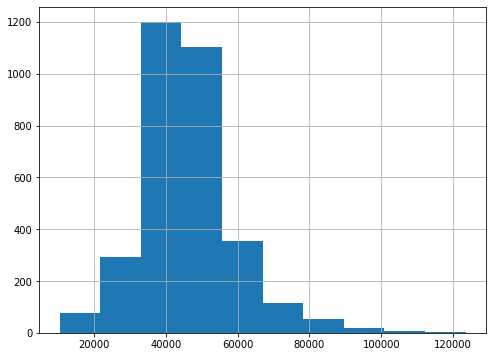

In [49]:
census['Income'].hist(figsize=(8,6));

In [12]:
pd.cut(census['Income'], 3).value_counts()

(10386.046, 48150.333]    1984
(48150.333, 85801.667]    1194
(85801.667, 123453.0]       41
Name: Income, dtype: int64

In [60]:
pd.qcut(census['Income'], [0, 0.25, 0.50, 0.75, 1]).value_counts()

(52074.0, 123453.0]     805
(38191.5, 44749.0]      805
(10498.999, 38191.5]    805
(44749.0, 52074.0]      804
Name: Income, dtype: int64

### 2.3 getting new features

In [13]:
census['HighUnemploymentLowIncome'] = np.where((census.Unemployment > 0.07) \
                                               & (pd.qcut(census.Income, 
                                                          [0, 0.3333, 0.6666, 1]).cat.codes == 0), 1, 0)
census['HighUnemploymentLowIncome'].head()

CensusId
1001    0
1003    0
1005    1
1007    1
1009    0
Name: HighUnemploymentLowIncome, dtype: int64

## 3. dimensionality reduction

### 3.1 feature selection techniques

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection

#### discard correlated features

In [61]:
census.corr()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,0.999877,0.999886,0.113882,-0.187370,0.075296,-0.046038,0.447874,0.027104,0.996378,...,-0.047901,0.036125,-0.027852,0.148545,0.997621,0.196913,-0.143553,-0.146419,-0.085016,0.030306
Men,0.999877,1.000000,0.999527,0.114286,-0.186478,0.072807,-0.045818,0.449085,0.028143,0.995819,...,-0.048278,0.036560,-0.027384,0.147537,0.997481,0.196025,-0.142667,-0.146133,-0.084826,0.029516
Women,0.999886,0.999527,1.000000,0.113466,-0.188187,0.077676,-0.046240,0.446604,0.026096,0.996685,...,-0.047526,0.035697,-0.028297,0.149481,0.997524,0.197722,-0.144373,-0.146661,-0.085180,0.031060
Hispanic,0.113882,0.114286,0.113466,1.000000,-0.724959,-0.144540,-0.056119,0.044244,-0.002645,0.104092,...,0.000392,0.041738,-0.120975,0.035312,0.102515,-0.170047,0.212196,-0.005562,-0.047897,0.321975
White,-0.187370,-0.186478,-0.188187,-0.724959,1.000000,-0.466185,-0.231565,-0.199347,-0.075080,-0.183133,...,-0.048004,-0.173506,0.217985,-0.077046,-0.176872,0.228257,-0.405057,0.202066,0.112044,-0.538941
Black,0.075296,0.072807,0.077676,-0.144540,-0.466185,1.000000,-0.097140,0.019916,-0.035385,0.081138,...,-0.169504,-0.004333,-0.281791,0.186750,0.071231,0.064072,0.115743,-0.305339,-0.137477,0.352578
Native,-0.046038,-0.045818,-0.046240,-0.056119,-0.231565,-0.097140,1.000000,-0.002663,0.033927,-0.050108,...,0.362889,0.347975,0.167324,-0.207657,-0.047252,-0.402015,0.452651,0.045619,0.077294,0.188074
Asian,0.447874,0.449085,0.446604,0.044244,-0.199347,0.019916,-0.002663,1.000000,0.353935,0.456733,...,0.187220,0.133118,0.013706,0.043008,0.463088,0.108109,-0.030053,-0.156825,-0.087749,-0.059663
Pacific,0.027104,0.028143,0.026096,-0.002645,-0.075080,-0.035385,0.033927,0.353935,1.000000,0.027806,...,0.209134,0.160300,0.020612,-0.066947,0.026891,-0.118206,0.140242,0.004529,-0.004515,-0.037973
Citizen,0.996378,0.995819,0.996685,0.104092,-0.183133,0.081138,-0.050108,0.456733,0.027806,1.000000,...,-0.051720,0.035693,-0.031685,0.152106,0.995176,0.212811,-0.152932,-0.161904,-0.092302,0.031339


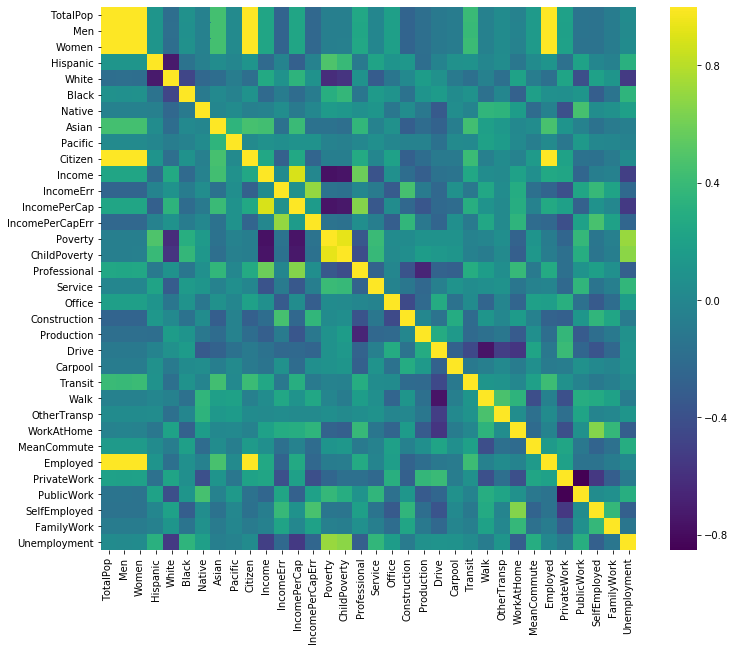

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(census.corr(), cmap='viridis');

#### greedy selection (backward)

In [73]:
census.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [16]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['Poverty', 
            'WorkAtHome', 
            'SelfEmployed', 
            'Black', 
            'Native', 
            'Asian', 
            'Pacific', 
            'Hispanic', 
            'IncomePerCap']

target = 'Unemployment'

X_train, X_test, y_train, y_test = train_test_split(census[features], census[target])

model = LinearRegression()
selector = RFE(model, n_features_to_select=3, step=1)
selector.fit(X_train, y_train)

print(selector.ranking_)
print([features[i] for i, chosen in enumerate(selector.support_) if chosen])

[1 5 1 4 2 3 1 6 7]
['Poverty', 'SelfEmployed', 'Pacific']


#### select features based on feature importance, coeffs, etc. (tree based models, linear models)

In [20]:
from sklearn.feature_selection import SelectFromModel

model = DecisionTreeRegressor()
selector = SelectFromModel(model, threshold=0.25)
selector.fit(X_train, y_train)

selector.transform(X_test).shape

(805, 1)

In [19]:
model.fit(X_train, y_train)
model.feature_importances_

array([0.47313223, 0.06133297, 0.0792818 , 0.06546584, 0.05427952,
       0.03055863, 0.012903  , 0.06168841, 0.1613576 ])

#### other techniques based on statistical tests

### 3.2 feature projection techniques

#### 3.2.1 PCA

already seen in previous lessons

#### 3.2.* other techniques

next week in unsupervised learning section.